In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', 199)
pd.options.display.float_format = '{:.2f}'.format

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [158]:
# nyt_cum = pd.read_csv(r"C:\Users\mikha\OneDrive\Desktop\Dropbox\MIKHAEL NEW\mikhael school\Grad School\Master's\594\Data\NYT COVID Data.csv", parse_dates=['date'])
# # nyt_non_cum = pd.read_csv(r"C:\Users\mikha\OneDrive\Desktop\Dropbox\MIKHAEL NEW\mikhael school\Grad School\Master's\594\Data\NYT non-cumulative COVID data.csv", parse_dates=['date'])

# county_pop = pd.read_csv(r"C:\Users\mikha\OneDrive\Desktop\Dropbox\MIKHAEL NEW\mikhael school\Grad School\Master's\594\Data\County pop data.csv")

# suburban_rural = pd.read_excel(r"C:/Users/mikha/OneDrive/Desktop/Dropbox/MIKHAEL NEW/mikhael school/Grad School/Master's/594/Data/Suburban vs Rural County Classifications.xlsx")

# Add "FIPS" column to county population dataset (thanks, census)

In [159]:
# def add_leading_zero(number_str):
    
#     if len(number_str) == 1:
#         return "0" + number_str
    
#     else:
#         return number_str
    
    
# def add_two_leading_zeros(number_str):
    
#     if len(number_str) == 2:
#         return "0" + number_str
    
#     elif  len(number_str) == 1:
#         return "00" + number_str
    
#     else:
#         return number_str

# county_pop['STATE'] = county_pop['STATE'].astype(str).apply(add_leading_zero)
# county_pop['COUNTY'] = county_pop['COUNTY'].astype(str).apply(add_two_leading_zeros)

# county_pop['FIPS'] = (county_pop['STATE'] + county_pop['COUNTY']).astype(int)

# Merge county population and suburban/rural classification datasets

In [160]:
# suburban_rural.rename(columns={'FIPS code':'FIPS', '2013 code':'Urban/Rural'}, inplace=True)

In [161]:
# county_info = county_pop.merge(suburban_rural, 
#                                how='outer',
#                                on='FIPS')

In [162]:
# for col in ['SUMLEV','REGION','DIVISION','STATE','COUNTY','STNAME']:
#     del county_info[col]

In [163]:
# county_info['FIPS'] = county_info['FIPS'].astype(float)

In [164]:
# county_info.to_csv(r"County Info.csv", index=False)

In [165]:
county_info = pd.read_csv(r"County Info.csv")

# Merge NYT datasets

## Get FIPS in non-cumulative nyt dataset

In [166]:
# def split_geoid_into_FIPS(geoid):
#     return geoid.split('-')[1]

## Process and rename

In [167]:
# nyt_cum.rename(columns={'fips':'FIPS', 'cases':'Cum. Cases', 'deaths':'Cum. Deaths'}, inplace=True)

## Convert cumulative cases to non-cumulative

In [168]:
# non_cum_cases_dict = {}

# for state in nyt_cum['state']:
#     print(state)
#     non_cum_cases_dict[state] = {}
    
#     for FIPS in nyt_cum[nyt_cum['state']==state]['FIPS'].unique():
#         print(FIPS)
#         non_cum_cases_dict[state][FIPS] = {}
        
#         for date in nyt_cum[(nyt_cum['state']==state) & (nyt_cum['FIPS']==FIPS)]['date'].unique():
#             print(date)
#             non_cum_cases_dict[state][FIPS][date] = {'Cum. Cases': nyt_cum[(nyt_cum['state']==state) & (nyt_cum['FIPS']==FIPS) & (nyt_cum['date']==date)]['Cum. Cases'],
#                                                     'Cum. Deaths': nyt_cum[(nyt_cum['state']==state) & (nyt_cum['FIPS']==FIPS) & (nyt_cum['date']==date)]['Cum. Deaths']}

In [169]:
# nyt_cum['Date before'] = nyt_cum['date'] - pd.Timedelta(days=1)

In [170]:
# nyt_cum['date'] = [date.strftime('%Y-%m-%d') for date in nyt_cum['date']]
# nyt_cum['Date before'] = [date.strftime('%Y-%m-%d') for date in nyt_cum['Date before']]

In [171]:
# daily_cases_dict = nyt_cum.groupby('FIPS')[['date','Cum. Cases', 'Cum. Deaths']].apply(lambda x: x.set_index('date').to_dict(orient='index')).to_dict()

In [172]:
# daily_cases = []
# daily_deaths = []
    
# for i, row in nyt_cum.iterrows():
#     print(i)
#     try:
#         daily_cases.append(daily_cases_dict[ row['FIPS'] ][ row['date'] ]['Cum. Cases'] - daily_cases_dict[ row['FIPS'] ][ row['Date before'] ]['Cum. Cases'])
#         daily_deaths.append(daily_cases_dict[ row['FIPS'] ][ row['date'] ]['Cum. Deaths'] - daily_cases_dict[ row['FIPS'] ][ row['Date before'] ]['Cum. Deaths'])
#     except Exception as e:
#         print(e, '\n    ',row['date'], row['state'], row['FIPS'])
#         daily_cases.append(np.nan)
#         daily_deaths.append(np.nan)

In [173]:
# nyt_cum['Daily Cases'] = daily_cases
# nyt_cum['Daily Deaths'] = daily_deaths

In [174]:
# del daily_cases, daily_deaths

In [175]:
# nyt_cum.to_csv(r"Processed NYT COVID Data.csv", index=False)

In [176]:
nyt_cum = pd.read_csv(r"Processed NYT COVID Data.csv")

In [177]:
# nyt_cum = nyt_cum[nyt_cum['county']!='Unknown']

## Merge both nyt datasets

In [178]:
# nyt = nyt_cum.merge(nyt_non_cum,
#                    how='outer',
#                    on=['FIPS','date'],
#                    suffixes=('_cum','_non_cum'))

### Replace "Unknown" entries with np.nan

In [179]:
# def repl_str(string):
#     if string=='Unknown':
#         return np.nan
#     else:
#         return string

# nyt['county_cum'] = nyt['county_cum'].apply(repl_str)
# nyt['county_non_cum'] = nyt['county_non_cum'].apply(repl_str)

# nyt['state_cum'] = nyt['state_cum'].apply(repl_str)
# nyt['state_non_cum'] = nyt['state_non_cum'].apply(repl_str)

### Delete redundant columns

In [180]:
# for col in ['geoid', 'cases_avg', 'cases_avg_per_100k', 'deaths_avg', 'deaths_avg_per_100k']:
#     del nyt[col]

## Collapse NYT data by week and FIPS

### convert date back to datetime

In [181]:
nyt_cum['date'] = pd.to_datetime(nyt_cum['date'])

In [182]:
# collapsed_nyt_weeks = nyt.set_index('date').groupby([pd.Grouper(freq='1W'), 'FIPS']).agg(
#     {'cases':'sum',
#      'deaths':'sum',
#     'FIPS':'median'}).droplevel('FIPS').reset_index()

collapsed_nyt_weeks = nyt_cum.set_index('date').groupby([pd.Grouper(freq='1W'), 'FIPS']).agg(
    {'Daily Cases':'sum',
     'Daily Deaths':'sum',
     'Cum. Cases':'mean',
     'Cum. Deaths': 'mean',
    'FIPS':'median'}).droplevel('FIPS').reset_index()

collapsed_nyt_months = nyt_cum.set_index('date').groupby([pd.Grouper(freq='1M'), 'FIPS']).agg(
    {'Daily Cases':'sum',
     'Daily Deaths':'sum',
     'Cum. Cases':'mean',
     'Cum. Deaths': 'mean',
    'FIPS':'median'}).droplevel('FIPS').reset_index()

In [183]:
del nyt_cum

In [184]:
collapsed_nyt_weeks['FIPS'] = collapsed_nyt_weeks['FIPS'].astype(int).astype(str)
collapsed_nyt_months['FIPS'] = collapsed_nyt_months['FIPS'].astype(int).astype(str)

In [185]:
def add_leading_zero_nyt(number_str):
    
    if len(number_str) == 4:
        return "0" + number_str
    
    else:
        return number_str

In [186]:
collapsed_nyt_weeks['FIPS'] = collapsed_nyt_weeks['FIPS'].apply(add_leading_zero_nyt).astype(float)
collapsed_nyt_months['FIPS'] = collapsed_nyt_months['FIPS'].apply(add_leading_zero_nyt).astype(float)

In [187]:
len(collapsed_nyt_months['FIPS'].unique())

3218

## Merge NYT data with county info

In [188]:
weeks_df = collapsed_nyt_weeks.merge(county_info,
                           on='FIPS',
                           how='left')

months_df = collapsed_nyt_months.merge(county_info,
                           on='FIPS',
                           how='left')

In [189]:
# del collapsed_nyt_weeks

### Get rid of error-inducing counties (puerto rico, deprecated, etc.)

In [190]:
erroneous_weeks_counties = weeks_df[weeks_df['County name'].isnull()]['FIPS'].unique()
weeks_df = weeks_df[ ~weeks_df['FIPS'].isin(erroneous_weeks_counties) ]

erroneous_months_counties = months_df[months_df['County name'].isnull()]['FIPS'].unique()
months_df = months_df[ ~months_df['FIPS'].isin(erroneous_months_counties) ]

### Set all negative cases and deaths to 0

## Add log and arcsinh-transformed case and death stats

In [191]:
def transform_col(col_name, dataframe):
    
    dataframe[f'Clipped {col_name}'] = dataframe[col].clip(lower=0)
    
    dataframe[f'Clipped {col_name} per 100k'] = (dataframe[f'Clipped {col_name}'] / dataframe['POPESTIMATE2019']) * 100000
    
    dataframe[f'Clipped log {col_name}'] = np.log(dataframe[f'Clipped {col_name}'] + 1)
    dataframe[f'Clipped arcsinh {col_name}'] = np.arcsinh(dataframe[f'Clipped {col_name}'] + 1)
    
    dataframe[f'Clipped log {col_name} per 100k'] = np.log(dataframe[f'Clipped {col_name} per 100k'] + 1)
    dataframe[f'Clipped arcsinh {col_name} per 100k'] = np.arcsinh(dataframe[f'Clipped {col_name} per 100k'] + 1)
    

In [192]:
for col in ['Daily Cases', 'Daily Deaths']:
    
    transform_col(col, weeks_df)
    
    transform_col(col, months_df)

## Detect and Remove Outliers

<AxesSubplot:>

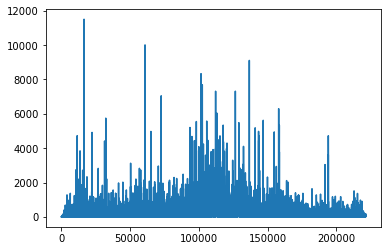

In [193]:
weeks_df['Clipped Daily Cases per 100k'].plot()

In [194]:
# weeks_df['FIPS'] = weeks_df['FIPS'].astype(int)

# months_df['FIPS'] = months_df['FIPS'].astype(int)

### Function for labeling outliers

In [195]:
def label_outliers(df, time_period):
    
    global erratic_fips
    if 'erratic_fips' not in globals():
        erratic_fips = {}
        for time_pd in ('W', 'M'):
            erratic_fips[time_pd] = {'Cases':[], 'Deaths':[]}    
    else:
        erratic_fips[time_period] = {'Cases':[], 'Deaths':[]}
    
    try:
        df.set_index('FIPS', inplace=True)
    except:
        pass
    
    df['Outlier Score - Cases'] = 0
    df['Sharp Spike - Cases'] = 0
    
    df['Outlier Score - Deaths'] = 0
    df['Sharp Spike - Deaths'] = 0
    
    for fips in df.index.unique():
        for data_field in ('Cases','Deaths'):
            
            stddev = df.loc[fips][f'Clipped Daily {data_field}'].std()
            normalized_changes = np.absolute(df.loc[fips][f'Clipped Daily {data_field}'].diff() / stddev)
            df.loc[fips, f'Outlier Score - {data_field}'] = normalized_changes
        
            if data_field == 'Cases':
                for x in normalized_changes:
                    if x > 4:
                        erratic_fips[time_period][data_field].append(fips)
            
            elif data_field == 'Deaths':
                for x in normalized_changes:
                    if x > 7:
                        erratic_fips[time_period][data_field].append(fips)
    
    
    for data_field in ('Cases','Deaths'):
        df.loc[erratic_fips[time_period][data_field], f'Sharp Spike - {data_field}'] = 1
                        
#     print(erratic_fips)
#             df.loc[erratic_fips[time_period][data_field], f'Sharp Spike - {data_field}'] = 1
        

In [196]:
label_outliers(weeks_df, 'W')

In [197]:
label_outliers(months_df, 'M')

### How many erratic counties (weekly)

In [198]:
(len(weeks_df[weeks_df['Outlier Score - Cases'] > 4].index.unique()) / len(weeks_df.index.unique())) * 100

16.086817746568784

In [199]:
(len(weeks_df[weeks_df['Outlier Score - Deaths'] > 7].index.unique()) / len(weeks_df.index.unique())) * 100

7.309288222151293

<AxesSubplot:>

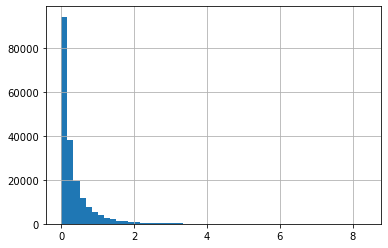

In [200]:
weeks_df[weeks_df['Outlier Score - Cases']>0]['Outlier Score - Cases'].hist(bins=50)

<AxesSubplot:>

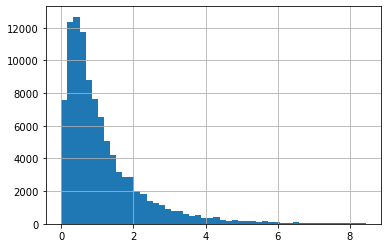

In [201]:
weeks_df[weeks_df['Outlier Score - Deaths']>0]['Outlier Score - Deaths'].hist(bins=50)

<AxesSubplot:>

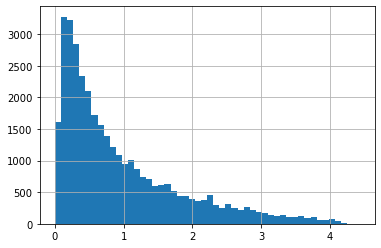

In [202]:
months_df[months_df['Outlier Score - Deaths']>0]['Outlier Score - Deaths'].hist(bins=50)

<AxesSubplot:>

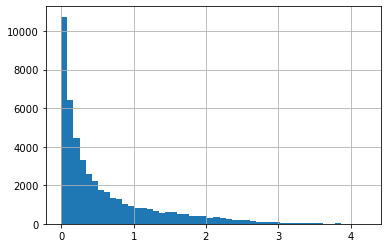

In [203]:
months_df[months_df['Outlier Score - Cases']>0]['Outlier Score - Cases'].hist(bins=50)

### How many erratic counties (weekly)

In [204]:
(len(weeks_df[weeks_df['Outlier Score - Cases'] > 4].index.unique()) / len(weeks_df.index.unique())) * 100

16.086817746568784

In [205]:
(len(weeks_df[weeks_df['Outlier Score - Deaths'] > 7].index.unique()) / len(weeks_df.index.unique())) * 100

7.309288222151293

### How many erratic counties (monthly)

In [206]:
(len(months_df[months_df['Outlier Score - Cases'] > 4].index.unique()) / len(months_df.index.unique())) * 100

0.12767315671879986

In [207]:
(len(months_df[months_df['Outlier Score - Deaths'] > 7].index.unique()) / len(months_df.index.unique())) * 100

0.0

In [208]:
weeks_df.reset_index(inplace=True)
months_df.reset_index(inplace=True)

### print 

In [209]:
# for fips in months_df['FIPS'].unique():
# #     print(fips)
#     print('Max std. dev = ' + str(months_df[months_df['FIPS']==fips]['Outlier Score - Cases'].max()))
#     months_df[months_df['FIPS']==fips]['Clipped Daily Cases'].plot(title=f'{fips} - New cases per month')
#     plt.show()
    
#     print('\n\n\n\n\n')
    
# #     months_df.loc[fips]['Clipped Daily Cases'].rolling(4).mean().plot()
# #     plt.show()

In [210]:
# for fips in erratic_fips['W']['Cases']:
# #     print(fips)
#     print('Max std. dev = ' + str(weeks_df[weeks_df['FIPS']==fips]['Outlier Score - Cases'].max()))
#     weeks_df[weeks_df['FIPS']==fips]['Clipped Daily Cases'].plot(title=f'{fips} - New cases per week')
#     plt.show()
    
#     print('\n\n\n\n\n')
    
# #     weeks_df.loc[fips]['Clipped Daily Cases'].rolling(4).mean().plot()
# #     plt.show()

In [211]:
# non_erratic_week_cases = list( set(weeks_df['FIPS'].unique().tolist()) - set(erratic_fips['W']['Cases']))

# for fips in non_erratic_week_cases:
# #     print(fips)
#     print('Max std. dev = ' + str(weeks_df[weeks_df['FIPS']==fips]['Outlier Score - Cases'].max()))
#     weeks_df[weeks_df['FIPS']==fips]['Clipped Daily Cases'].plot(title=f'{fips} - New cases per week')
#     plt.show()
    
#     print('\n\n\n\n\n')
    
# #     weeks_df.loc[fips]['Clipped Daily Cases'].rolling(4).mean().plot()
# #     plt.show()

In [212]:
# for fips in semi_erratic_fips:
#     print(fips)
#     weeks_df[weeks_df['FIPS']==fips[0]]['Clipped Daily Cases'].plot()
    
#     plt.show()

In [213]:
# for fips in weeks_df['FIPS'].unique():
#     if fips not in [fips[0] for fips in erratic_fips]:
#         weeks_df[weeks_df['FIPS']==fips]['Clipped Daily Cases'].plot()
#         plt.show()

# Create State-Aggregated Dataset

In [215]:
state_agg_dict = {'Daily Cases': 'sum',
                  'Daily Deaths': 'sum',
                  'Cum. Cases': 'sum',
                  'Cum. Deaths': 'sum',
                  'POPESTIMATE2019': 'sum'
}

In [216]:
state_weeks_df = weeks_df.groupby(['State Abr.', 'date']).agg(state_agg_dict)

state_months_df = months_df.groupby(['State Abr.', 'date']).agg(state_agg_dict)

In [217]:
for col in ['Daily Cases', 'Daily Deaths']:
    
    transform_col(col, state_weeks_df)
    
    transform_col(col, state_months_df)

## Label States w/out all counties

Some counties take time to get their case/death-reporting pipeline together, so some states have incomplete statistics for the first few weeks

In [220]:
def within_range_of_mode(value, mode):
    return (mode * .9) <= value and value <= (mode * 1.1)

In [230]:
def label_countyless_obs(state_df):
    
    state_df['Missing Counties Now'] = 0
    
    for state in state_df.index.get_level_values(0).unique():
    
        pop_mode = int(state_df.loc[state, 'POPESTIMATE2019'].mode())

        state_months_df.loc[state, 'Missing Counties Now'] = [1 - within_range_of_mode(x, pop_mode) for x in state_months_df.loc[state]['POPESTIMATE2019']]#.tolist()])

In [231]:
label_countyless_obs(state_months_df)

label_countyless_obs(state_weeks_df)

# Save

In [233]:
weeks_df.to_csv(r"C:/Users/mikha/OneDrive/Desktop/Dropbox/MIKHAEL NEW/mikhael school/Grad School/Master's/594/Data/FINAL DF BEFORE CT MERGE - Week X County.csv", index=False)
months_df.to_csv(r"C:/Users/mikha/OneDrive/Desktop/Dropbox/MIKHAEL NEW/mikhael school/Grad School/Master's/594/Data/FINAL DF BEFORE CT MERGE - Month X County.csv", index=False)
state_weeks_df.to_csv(r"C:/Users/mikha/OneDrive/Desktop/Dropbox/MIKHAEL NEW/mikhael school/Grad School/Master's/594/Data/FINAL DF BEFORE CT MERGE - Week X State.csv", index=False)
state_months_df.to_csv(r"C:/Users/mikha/OneDrive/Desktop/Dropbox/MIKHAEL NEW/mikhael school/Grad School/Master's/594/Data/FINAL DF BEFORE CT MERGE - Month X State.csv", index=False)